In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape) > 2:  # Check if the image has more than 2 dimensions (i.e., color image)
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    cv.fillPoly(mask, vertices, ignore_mask_color)
    masked_img = cv.bitwise_and(img, mask)
    return masked_img

In [17]:
def draw_the_lines(img, lines): 
    imge = np.copy(img)
    blank_image = np.zeros(imge.shape, dtype=np.uint8)
    
    for line in lines:  
        for x1, y1, x2, y2 in line:
            cv.line(blank_image, (x1, y1), (x2, y2), (0,255,0), thickness=3)
    
    imge = cv.addWeighted(imge, 0.8, blank_image, 1, 0.0) 
    return imge

In [18]:
# import cv2
# img=cv2.imread('frame6.jpg')
# len(img.shape)

In [19]:
# def region_of_interest(img, vertices):
#     mask = np.zeros_like(img)
#     cv.fillPoly(mask, vertices, 255)
#     masked_img = cv.bitwise_and(img, mask)
#     return masked_img

# video = cv.VideoCapture("videos/harder_challenge_video.mp4")
# width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
# height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

# writer1 = cv.VideoWriter('original.mp4', cv.VideoWriter_fourcc(*'MPEG'), 20, (width, height))
# writer2 = cv.VideoWriter('Edge_detection.mp4', cv.VideoWriter_fourcc(*'MPEG'), 2, (width, height))
# writer3 = cv.VideoWriter('final.mp4', cv.VideoWriter_fourcc(*'MPEGq'), 2, (width, height))

# while True:
#     # Read a frame from the video
#     ret, frame = video.read()

#     # Break the loop if the video has ended
#     if not ret:
#         break

#     # Correct the variable name for color conversion
#     frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
   

#     # Blur and apply Canny edge detection
#     frame_blurred = cv.GaussianBlur(frame, (7, 7), 0)
#     frame1 = cv.Canny(frame_blurred, 75, 150)

#     writer1.write(frame)

#     # Use frame1 for further processing
#     image = frame1

#     height = image.shape[0]
#     width = image.shape[1]
#     region_of_interest_coor = [(0, height), (0, 400), (width//2, height//3), (width, height)]
#     cropped = region_of_interest(image, np.array([region_of_interest_coor], np.int32))

#     lines = cv.HoughLinesP(cropped, rho=2, theta=np.pi/120, threshold=120, lines=np.array([]), minLineLength=20, maxLineGap=35)
#     frame1 = draw_the_lines(frame, lines) 

#     cv.imshow('Video cropped', cropped)
#     cv.imshow('Video', frame1)

#     writer2.write(frame1)
#     writer3.write(cropped)

#     if cv.waitKey(25) & 0xFF == ord('q'):
#         cv.destroyAllWindows()
#         break

# # Release the VideoWriter objects outside the loop
# writer1.release()
# writer2.release()
# writer3.release()

In [20]:
video = cv.VideoCapture("videos/harder_challenge_video.mp4")
width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

writer1 = cv.VideoWriter('original.mp4', cv.VideoWriter_fourcc(*'MPEG'), 20, (width, height))
writer2 = cv.VideoWriter('Edge_detection.mp4', cv.VideoWriter_fourcc(*'MPEG'), 2, (width, height))
writer3 = cv.VideoWriter('final.mp4', cv.VideoWriter_fourcc(*'MPEG'), 2, (width, height))

while True:
    # Read a frame from the video
    ret, frame = video.read()
    # Break the loop if the video has ended
    if not ret:
        break

    # Correct the variable name for color conversion
    # frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    for i in range(720):
        condition = (frame[i,:,0] > 240) & (frame[i,:,1] > 240) & (frame[i,:,2] > 240)
        frame[i, condition, 0:2] = 0
    
    # Blur and apply Canny edge detection
    frame_blurred = cv.GaussianBlur(frame, (7, 7), 0)
    frame1 = cv.Canny(frame_blurred, 75, 150)
    
    # Use frame1 for further processing
    image = frame1

    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_coor = [(0, height), (width//3, height//2.5), (width//2.5, height//2.5), (width, height-30)]
    cropped = region_of_interest(image, np.array([region_of_interest_coor], np.int32))
    
    # for i in range(720):
    #     condition = (cropped[i,:,0] > 240) & (cropped[i,:,1] > 240) & (cropped[i,:,2] > 240)
    #     cropped[i, condition, 0:2] = 0

    # lines = cv.HoughLinesP(cropped, rho=2, theta=np.pi/120, threshold=120, lines=np.array([]), minLineLength=20, maxLineGap=35)
    # frame1 = draw_the_lines(frame, lines) 
    cv.imshow("cropped",cropped)    
    cv.imshow('Video', frame1)
    cv.imshow("orginal ",frame)
    writer1.write(frame)
    writer2.write(frame1)
    writer3.write(cropped)

    if cv.waitKey(25) & 0xFF == ord('q'):
        cv.destroyAllWindows()
        break
writer1.release()
writer2.release()
writer3.release()

In [21]:
import cv2 as cv
import numpy as np
video = cv.VideoCapture("videos\harder_challenge_video.mp4")
while True:
    # Read a frame from the video
    ret, frame = video.read()
    # Break the loop if the video has ended
    if not ret:
        break
    frame1= cv.GaussianBlur(frame,(7,7),0)
    frame1 = cv.Canny(frame1,75,150)
    cv.imshow('Video', frame1)
    if cv.waitKey(25) & 0xFF == ord('q'):
        cv.destroyAllWindows()
        break

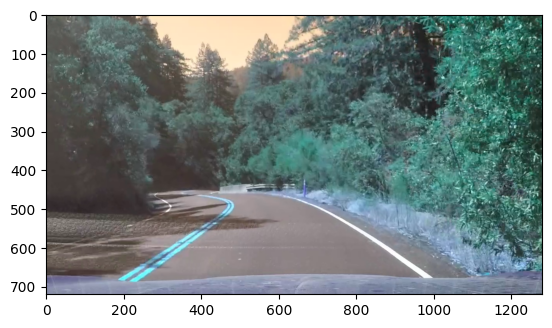

In [22]:
img=cv.imread('frame_0035.png')
image=img
plt.imshow(img)

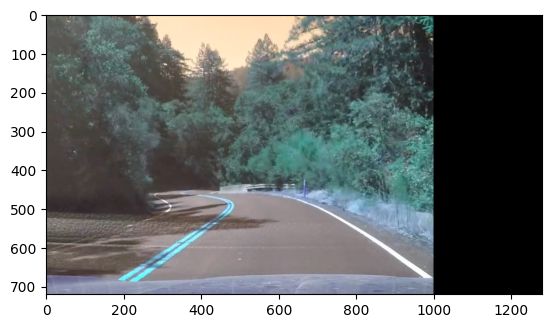

In [23]:
img[:,1000:,:]=0
plt.imshow(img)

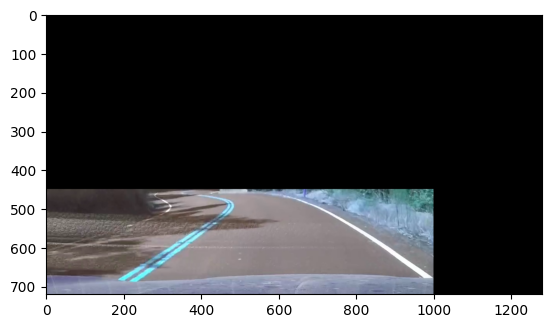

In [24]:
img[:450,:,:]=0
plt.imshow(img)

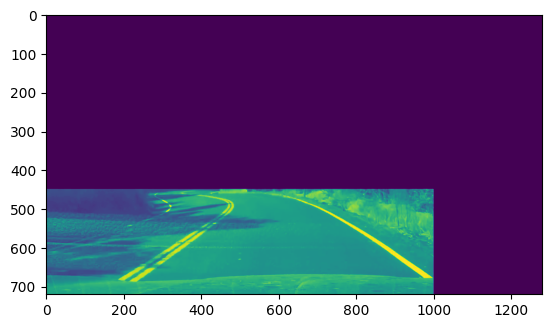

In [25]:
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img)

In [26]:
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()

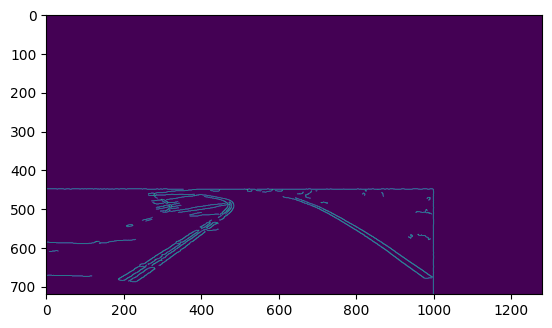

In [27]:
img= cv.GaussianBlur(img, (7, 7), 0)
img1=cv.Canny(img, 75, 150)
plt.imshow(img1)

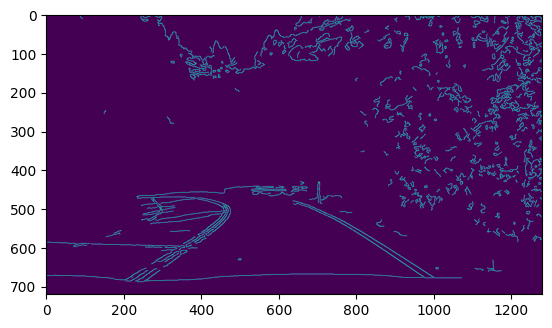

In [28]:
image= cv.GaussianBlur(frame, (7, 7), 0)
img1=cv.Canny(image, 75, 150)
plt.imshow(img1)